## Exploratory Data Analysis (EDA) is a crucial first step in any data science project. It helps us understand the data, uncover patterns, detect anomalies, and prepare the data for modeling.

Exploratory Data Analysis (EDA) in Python
EDA is an iterative process of analyzing data to summarize their main characteristics, often with visual methods.

Setting Up Your Environment and Loading Data
First, you need to import the necessary libraries and load your dataset.

pandas: For data manipulation and analysis.

numpy: For numerical operations.

matplotlib.pyplot: For basic plotting.

seaborn: For enhanced statistical visualizations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#You can use any file here
df = pd.read_csv("Output - Copy.csv")

# Let's rename the columns to be more Python-friendly (no spaces, consistent case)
df.rename(columns={'CustomerID' : 'CustomerID','Genre' : 'Gender','Age' : 'Age','Annual Income (k$)' : 'Annual Inc','Spending Score (1-100)' : 'SpendingScore'}, inplace=True)

In [3]:
print("\nFirst 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   CustomerID  Gender   Age  Annual Inc  SpendingScore
0           1    Male  19.0         NaN           39.0
1           2    Male  21.0         NaN           81.0
2           3  Female  20.0        16.0            6.0
3           4  Female  23.0        16.0           77.0
4           5  Female  31.0        17.0           40.0


Initial Data Inspection
Before diving deep, let's get a general overview of the data.

df.info(): Provides a concise summary of the DataFrame, including the number of non-null entries, data types, and memory usage.

df.shape: Returns a tuple representing the dimensionality of the DataFrame (rows, columns).

df.columns: Lists all column names.

df.dtypes: Shows the data type of each column.

In [4]:
print("\nDataFrame Info:")
df.info()

print("\nShape of the DataFrame (rows, columns):", df.shape)

print("\nColumn Names:")
print(df.columns)

print("\nData Types of each column:")
print(df.dtypes)


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     200 non-null    int64  
 1   Gender         200 non-null    object 
 2   Age            180 non-null    float64
 3   Annual Inc     179 non-null    float64
 4   SpendingScore  171 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 7.9+ KB

Shape of the DataFrame (rows, columns): (200, 5)

Column Names:
Index(['CustomerID', 'Gender', 'Age', 'Annual Inc', 'SpendingScore'], dtype='object')

Data Types of each column:
CustomerID         int64
Gender            object
Age              float64
Annual Inc       float64
SpendingScore    float64
dtype: object


df.info() is invaluable. It immediately tells you if you have missing values (look at "non-null" counts) and if your data types are correctly inferred (e.g., numbers as int or float, text as object).

df.shape confirms the total number of records and features.

df.columns and df.dtypes are quick checks to ensure you know what you're working with.

## Handling Missing Values
Missing data is a common issue. It can lead to biased results or errors.

df.isnull().sum(): Counts the number of missing values per column.

df.duplicated().sum(): Checks for duplicate rows.

In [5]:
print("\nMissing values in each column:")
print(df.isnull().sum())

print("\nNumber of duplicate rows:", df.duplicated().sum())

# Example of handling missing values (if any were present)
# For numerical columns, you might fill with mean/median:
# df['AnnualIncome'].fillna(df['AnnualIncome'].mean(), inplace=True)

# For categorical columns, you might fill with mode:
# df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

# Or, if missing values are few and random, you might drop rows:
# df.dropna(inplace=True)
# print("\nDataFrame after dropping rows with missing values (if any):")
# print(df.isnull().sum())


Missing values in each column:
CustomerID        0
Gender            0
Age              20
Annual Inc       21
SpendingScore    29
dtype: int64

Number of duplicate rows: 0


df.isnull().sum() is the primary way to identify missing values.

df.duplicated().sum() is important for ensuring data uniqueness, as duplicate rows can skew analysis.

The commented-out code shows common strategies for handling missing data:

Imputation: Filling missing values with a statistic (mean, median, mode).

Deletion: Removing rows or columns with missing values.

For mall.csv, it's common for there to be no missing values, but it's always good to check.

## Descriptive Statistics
Understand the central tendency, dispersion, and shape of your dataset's distribution.

df.describe(): Generates descriptive statistics for numerical columns.

df.describe(include='object'): Generates descriptive statistics for categorical columns.

In [6]:
print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe())

print("\nDescriptive Statistics for Categorical Columns:")
print(df.describe(include='object'))


Descriptive Statistics for Numerical Columns:
       CustomerID         Age  Annual Inc  SpendingScore
count  200.000000  180.000000  179.000000     171.000000
mean   100.500000   38.394444   64.413408      51.228070
std     57.879185   13.404951   24.893188      24.005404
min      1.000000   18.000000   16.000000       3.000000
25%     50.750000   29.000000   48.000000      39.000000
50%    100.500000   35.000000   63.000000      50.000000
75%    150.250000   48.000000   78.000000      71.500000
max    200.000000   70.000000  137.000000      99.000000

Descriptive Statistics for Categorical Columns:
        Gender
count      200
unique       2
top     Female
freq       112


df.describe() provides statistics like count, mean, standard deviation, min, max, and quartiles for numerical columns. This gives you a quick sense of the range and distribution of values. For example, you can see the average age, the range of annual incomes, etc.

df.describe(include='object') is useful for categorical columns, showing unique values, top value (mode), and its frequency. For Gender, it would tell you if there are more males or females, and how many unique gender categories exist.

## Univariate Analysis (Analyzing Single Variables)
Examine individual features to understand their distributions and characteristics.

Numerical Columns:
Histograms: Show the distribution of a numerical variable.

Box Plots: Display the distribution of numerical data and detect outliers.

Text(0.5, 1.0, 'Distribution of Age')

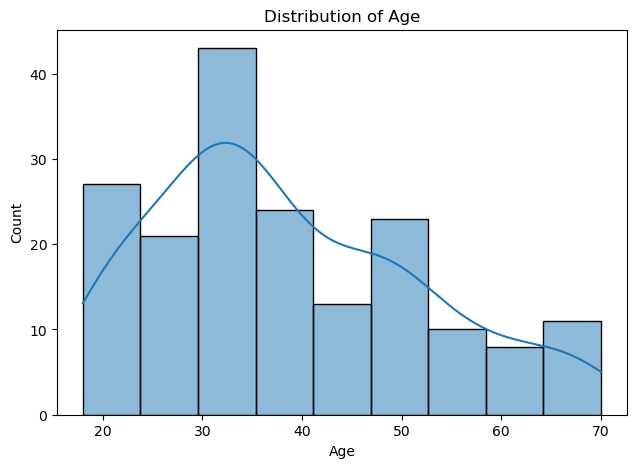

In [13]:
plt.figure(figsize=(25,5))

plt.subplot(1,3,1)
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')



Text(0.5, 1.0, 'Distribution of Annual Inc')

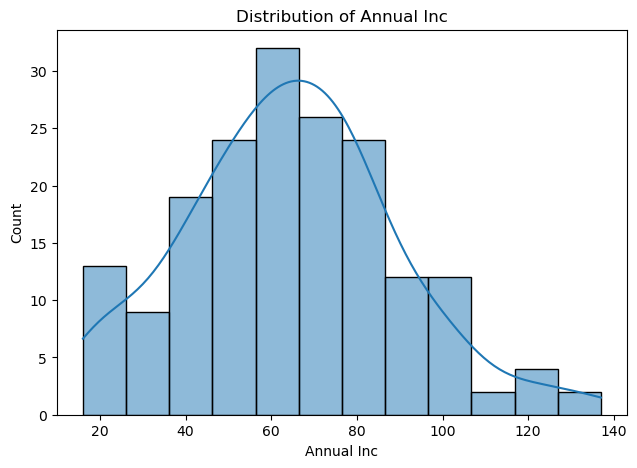

In [23]:
plt.figure(figsize=(25,5))

plt.subplot(1,3,1)
sns.histplot(df['Annual Inc'], kde=True)
plt.title('Distribution of Annual Inc')

Text(0.5, 1.0, 'Distribution of SpendingScore')

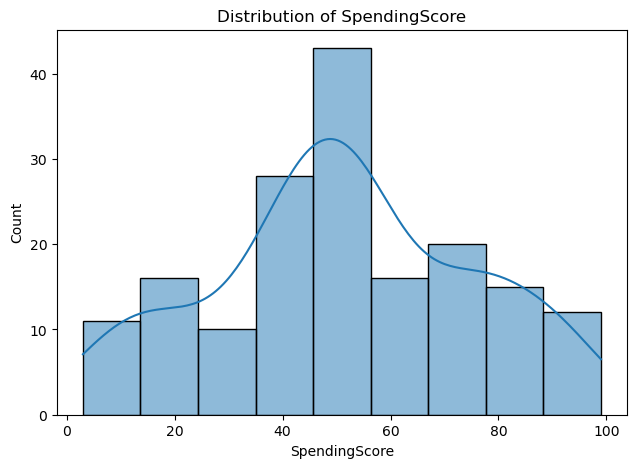

In [21]:
plt.figure(figsize=(25,5))

plt.subplot(1,3,1)
sns.histplot(df['SpendingScore'], kde=True)
plt.title('Distribution of SpendingScore')



<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Boxplot of Age')

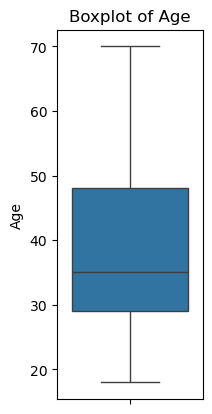

In [22]:
plt.tight_layout()
plt.show()

plt.subplot(1,3,1)
sns.boxplot(y=df['Age'])
plt.title('Boxplot of Age')

Histograms like sns.histplot (with kde=True for a Kernel Density Estimate overlay) help visualize the shape of the distribution (e.g., normal, skewed).

Box plots (sns.boxplot) are excellent for identifying outliers (points outside the "whiskers") and understanding the spread (interquartile range, median).

Categorical Columns:
Count Plots/Bar Charts: Show the frequency of each category.

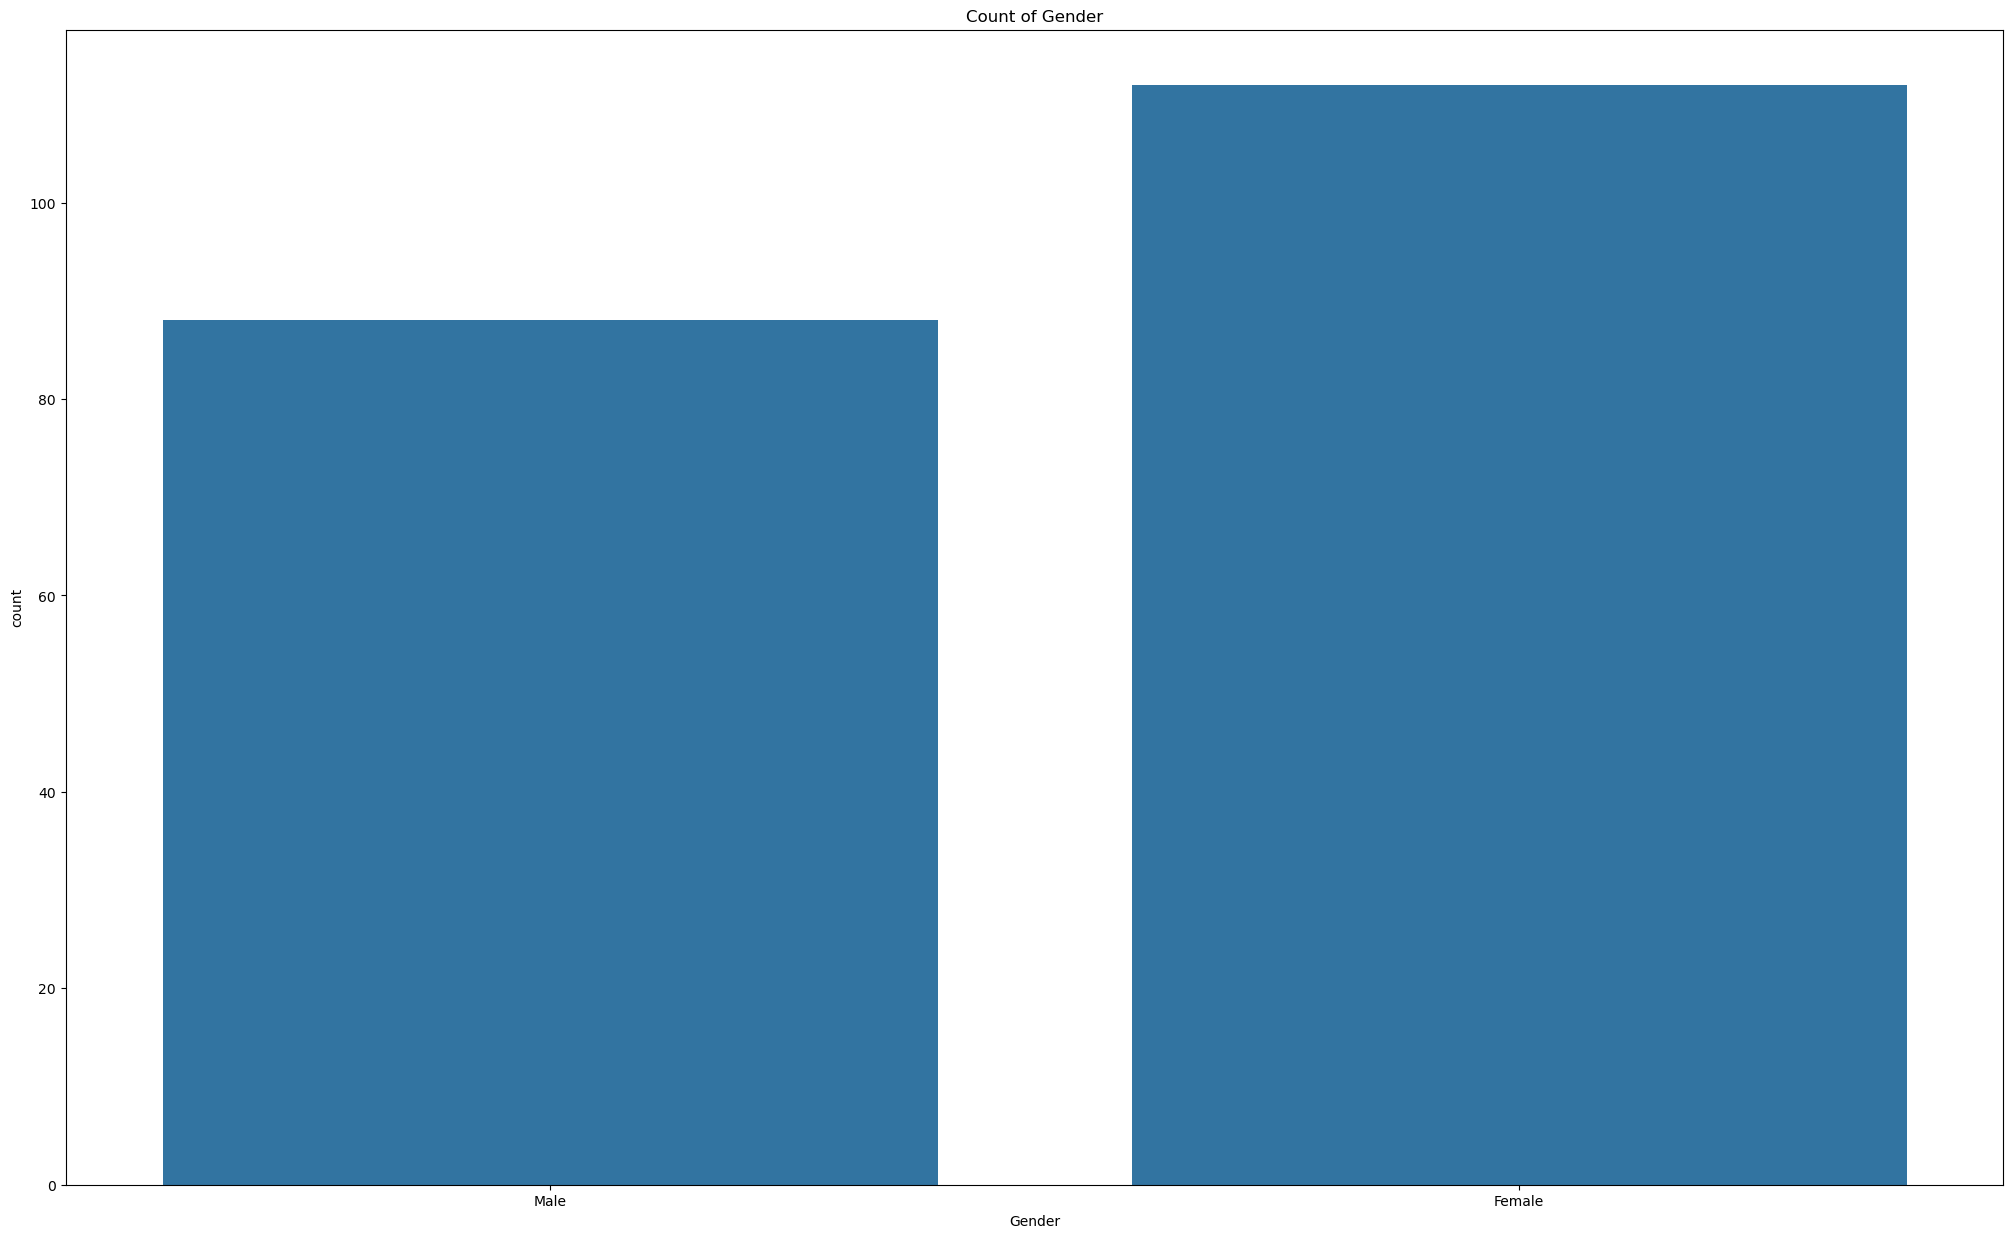

In [28]:
plt.figure(figsize=(25,15))

sns.countplot(x='Gender', data=df)
plt.title('Count of Gender')
plt.show()

sns.countplot quickly visualizes the counts of each unique value in a categorical column. This helps understand the balance or imbalance of categories.

## Bivariate Analysis (Analyzing Relationships Between Two Variables)
Explore how variables relate to each other.

Numerical vs. Numerical:
Scatter Plots: Show the relationship between two numerical variables.

Correlation Matrix: Quantifies the linear relationship between numerical variables.

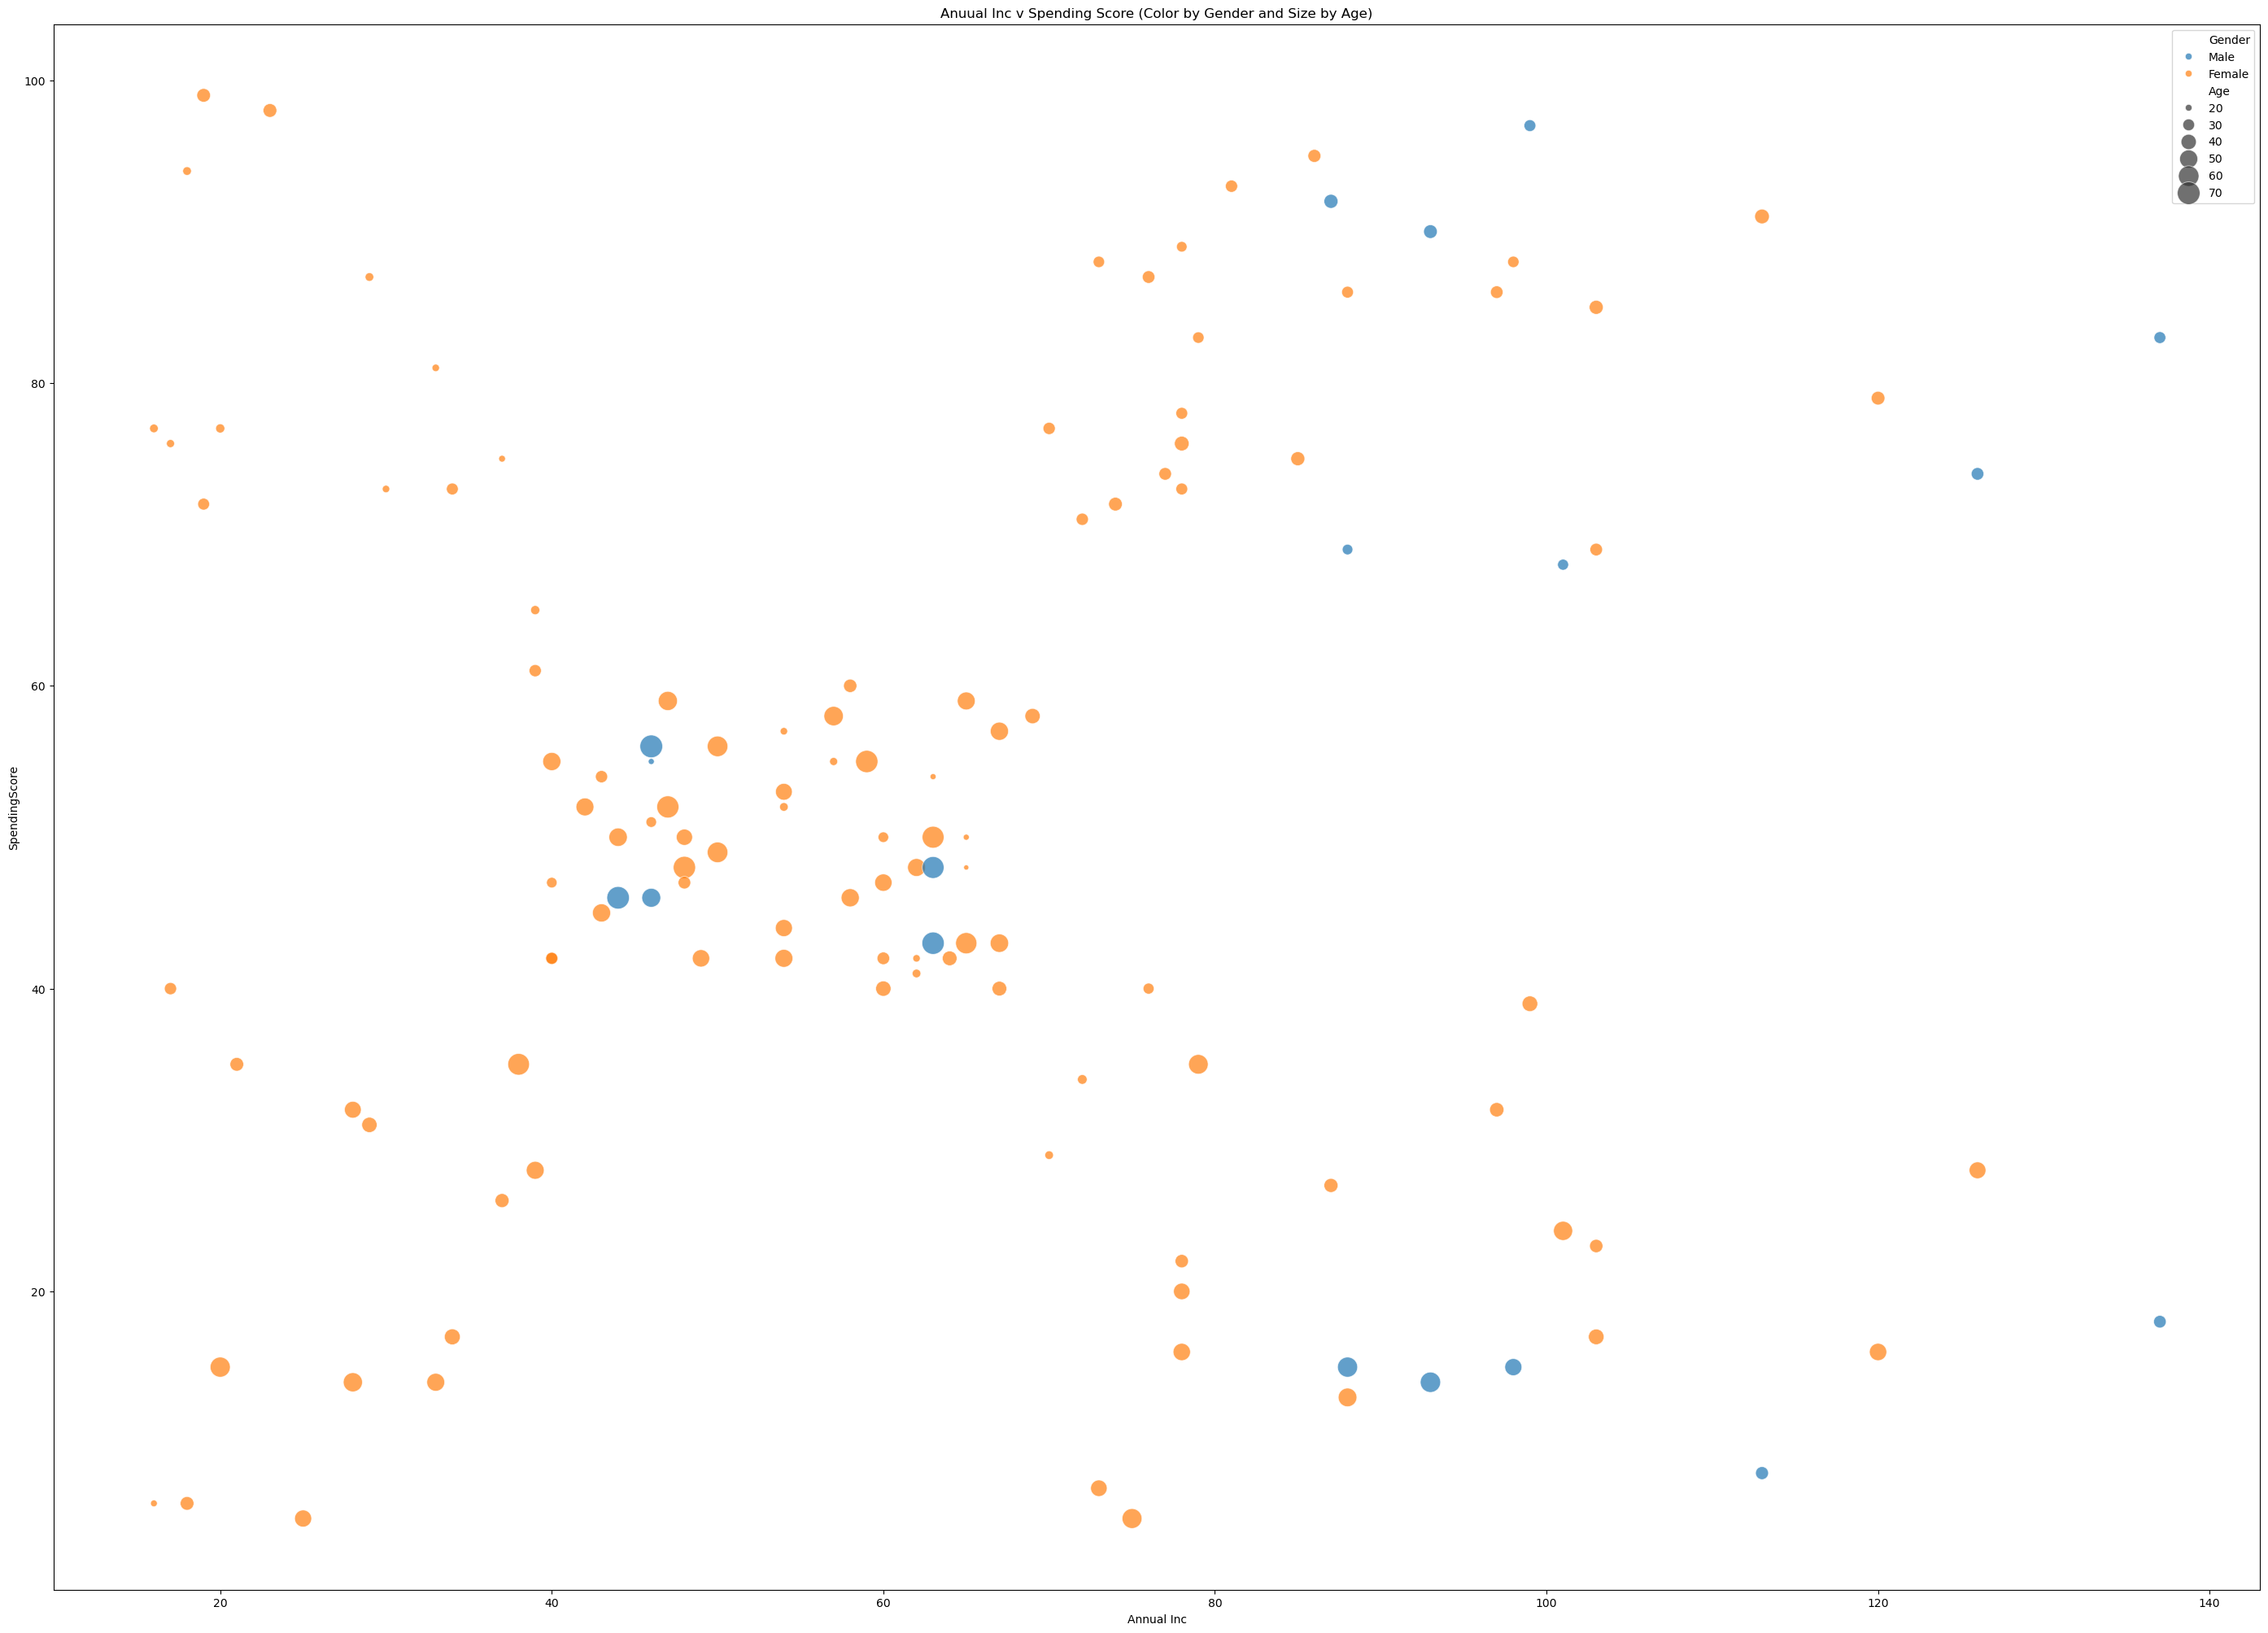

In [33]:
plt.figure(figsize=(35,25))
sns.scatterplot(x='Annual Inc', y='SpendingScore', data=df, hue='Gender', 
                size='Age', sizes=(20, 400), alpha=0.7)
plt.title('Anuual Inc v Spending Score (Color by Gender and Size by Age)')
plt.xlabel('Annual Inc') 
plt.ylabel('SpendingScore')
plt.show()

In [35]:
NumCols = ['Age', 'Annual Inc', 'SpendingScore']
coorelation_matrix = df[NumCols].corr()
print('\nCoorelation MAtrix:')
print(coorelation_matrix)


Coorelation MAtrix:
                    Age  Annual Inc  SpendingScore
Age            1.000000   -0.024029      -0.444955
Annual Inc    -0.024029    1.000000       0.043039
SpendingScore -0.444955    0.043039       1.000000


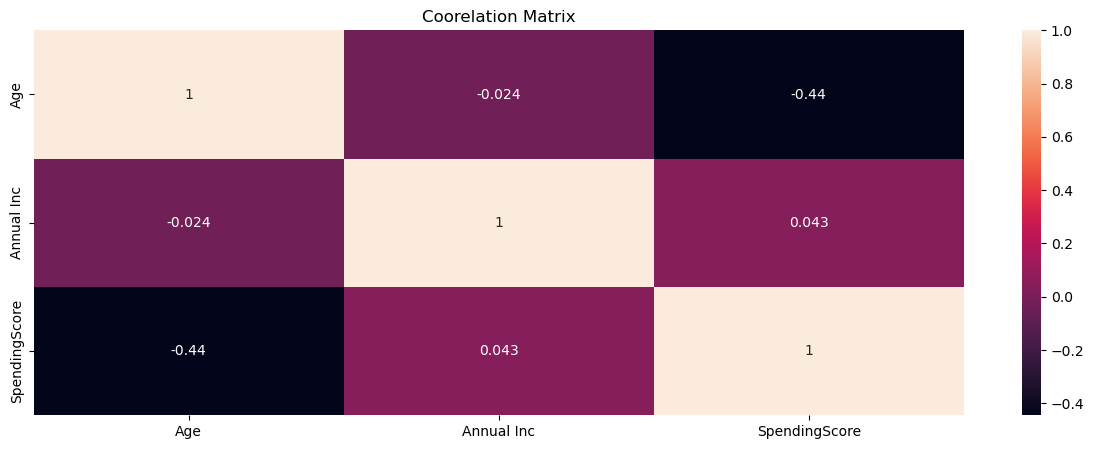

In [38]:
plt.figure(figsize=(15,5))
sns.heatmap(coorelation_matrix, annot=True)
plt.title('Coorelation Matrix')
plt.show()

Scatter plots (sns.scatterplot) are crucial for observing patterns, trends, or clusters between two numerical variables. Adding hue (color) and size (marker size) based on other variables can reveal deeper insights. Here, we can see if spending score is related to annual income, and how age and gender might play a role.

Correlation matrix (df.corr()) provides numerical values (from -1 to 1) indicating the strength and direction of a linear relationship. A heatmap (sns.heatmap) makes this easy to visualize. Values close to 1 indicate a strong positive correlation, -1 a strong negative correlation, and 0 no linear correlation.

## Categorical vs. Numerical

Box Plots/Violin Plots: Compare the distribution of a numerical variable across different categories.

Bar Plots (Mean/Median): Show the average/median of a numerical variable for each category.

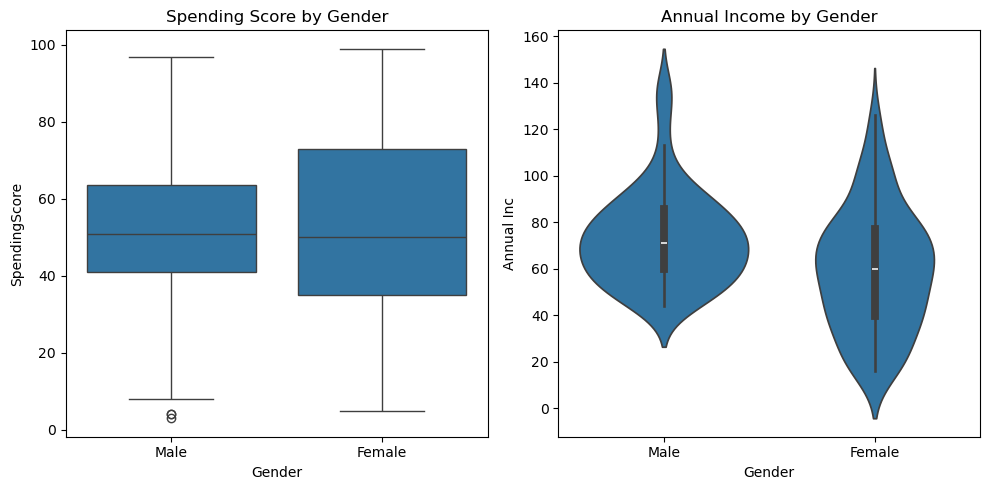


Mean Spending Score by Gender:
Gender
Female    51.526786
Male      50.661017
Name: SpendingScore, dtype: float64


In [40]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='SpendingScore', data=df)
plt.title('Spending Score by Gender')

plt.subplot(1, 2, 2)
sns.violinplot(x='Gender', y='Annual Inc', data=df)
plt.title('Annual Income by Gender')

plt.tight_layout()
plt.show()

# Example: Mean Spending Score by Gender
print("\nMean Spending Score by Gender:")
print(df.groupby('Gender')['SpendingScore'].mean())

## Multivariate Analysis (Analyzing Relationships Among Three or More Variables)

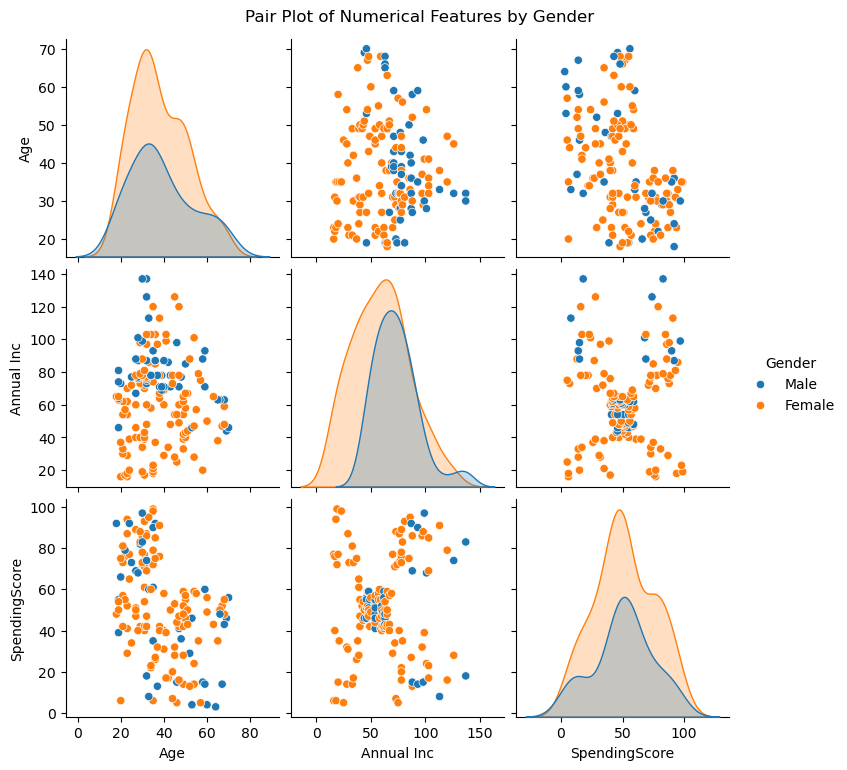

In [43]:
# Pair plot for numerical columns, colored by Gender
sns.pairplot(df[['Age', 'Annual Inc', 'SpendingScore', 'Gender']], hue='Gender', diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features by Gender', y=1.02) # Adjust suptitle position
plt.show()

sns.pairplot is a powerful tool for multivariate analysis. It creates a grid of scatter plots for each pair of numerical variables and histograms/KDEs for the diagonal (showing the distribution of each variable). Using hue='Gender' allows us to see how these relationships differ across genders. This can reveal complex interactions at a glance. For instance, you might see distinct clusters for males and females in the Annual Income vs. Spending Score scatter plot.

## Outlier Detection (Revisiting with a focus)

Outliers can significantly impact model performance. While box plots are good for visualization, you might want more systematic detection.

IQR Method: Values outside 1.5
timesIQR from the quartiles are often considered outliers.

Z-score Method: Values with a Z-score above a certain threshold (e.g., 2 or 3) are considered outliers.

In [44]:
# IQR Method for 'SpendingScore'
Q1 = df['SpendingScore'].quantile(0.25)
Q3 = df['SpendingScore'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df[(df['SpendingScore'] < lower_bound) | (df['SpendingScore'] > upper_bound)]
print(f"\nOutliers in SpendingScore (IQR Method):\n{outliers_iqr}")

# Z-score Method for 'Age'
from scipy.stats import zscore

df['Age_Zscore'] = np.abs(zscore(df['Age']))
outliers_zscore = df[df['Age_Zscore'] > 2] # Common threshold for outliers
print(f"\nOutliers in Age (Z-score Method, threshold > 2):\n{outliers_zscore[['Age', 'Age_Zscore']]}")

# You can then decide how to handle them: remove, transform, or keep based on context.


Outliers in SpendingScore (IQR Method):
Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Inc, SpendingScore]
Index: []

Outliers in Age (Z-score Method, threshold > 2):
Empty DataFrame
Columns: [Age, Age_Zscore]
Index: []


The IQR method is robust to skewed distributions. It defines outliers as points far from the central 50% of the data.

The Z-score method is suitable for normally distributed data. A high absolute Z-score indicates a data point is many standard deviations away from the mean.

The choice of method and how to handle outliers (remove, transform, or keep) depends on the context and the impact on your analysis/model.

## Feature Engineering (Brief Introduction in EDA Context)

Sometimes, new features can be created from existing ones to better capture relationships.

Binning: Grouping numerical data into categories.

Ratio/Interaction features: Creating new features by combining existing ones.


DataFrame with new 'AgeGroup' column:
    Age AgeGroup
0  19.0      <20
1  21.0    20-29
2  20.0    20-29
3  23.0    20-29
4  31.0    30-39


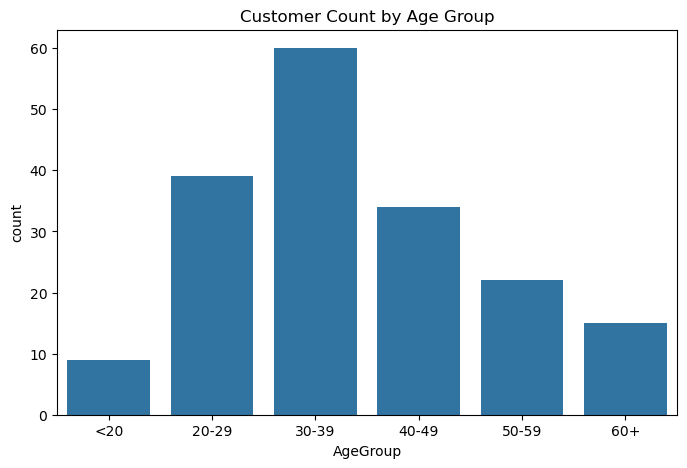


DataFrame with new 'SpendingRatio' column:
   Annual Inc  SpendingScore  SpendingRatio
0         NaN           39.0            NaN
1         NaN           81.0            NaN
2        16.0            6.0       0.375000
3        16.0           77.0       4.812500
4        17.0           40.0       2.352941


In [49]:
# Example: Binning 'Age' into categories
bins = [0, 20, 30, 40, 50, 60, df['Age'].max()]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

print("\nDataFrame with new 'AgeGroup' column:")
print(df[['Age', 'AgeGroup']].head())

plt.figure(figsize=(8, 5))
sns.countplot(x='AgeGroup', data=df, order=labels)
plt.title('Customer Count by Age Group')
plt.show()

# Example: Creating a ratio (e.g., Spending Ratio)
df['SpendingRatio'] = df['SpendingScore'] / df['Annual Inc']
print("\nDataFrame with new 'SpendingRatio' column:")
print(df[['Annual Inc', 'SpendingScore', 'SpendingRatio']].head())

Binning converts a continuous variable into a categorical one. This can be useful for analysis or for models that prefer categorical inputs.

Creating new features like SpendingRatio (Spending Score per unit of Annual Income) can reveal new insights or provide a more meaningful metric for your analysis.

## Conclusion and Next Steps

After conducting a thorough EDA, you should have a much better understanding of your mall.csv dataset.

Key takeaways from your EDA might include:

Are there any missing values, and how should they be handled?

What are the distributions of Age, Annual Income, and Spending Score? Are they skewed? Do they have outliers?

What is the gender distribution of your customers?

Is there a relationship between Annual Income and Spending Score? (e.g., do higher-income individuals spend more or less?)

Are there any differences in spending patterns or income levels between genders or age groups?

Are there any distinct customer segments or clusters emerging from the data (e.g., high income, low spending; low income, high spending)?

## Next Steps after EDA:

Data Cleaning: Apply the strategies identified during EDA to handle missing values, outliers, and duplicates.

Feature Engineering: Further develop or refine new features that might be beneficial for modeling.

Feature Scaling/Transformation: For some models, numerical features might need to be scaled (e.g., StandardScaler, MinMaxScaler) or transformed (e.g., log transformation for skewed data).

Modeling: Based on your understanding, choose appropriate machine learning models (e.g., clustering for customer segmentation, regression for predicting spending, classification for predicting customer churn if you had such a target).

Reporting: Document your findings, visualizations, and insights.

